# xyz_mp4
Create animation of xy chart using `matplotlib` library.


## example 1
+ Source: https://stackoverflow.com/q/37146420/9475509 and the answers.
+ Status: - (-).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


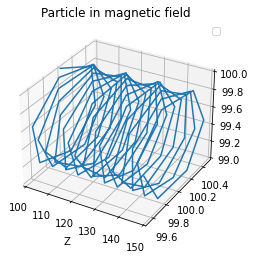

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg\\bin\\ffmpeg.exe'
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

x=np.linspace(100,150,100)
t=(x-100)/0.5
y=-.01*np.cos(t)+.5*np.sin(t)+100.01
z=.01*np.sin(t)+.5*np.cos(t)+99.5

def animate(i):
    line.set_data(x[:i],y[:i])
    line.set_3d_properties(z[:i])
    return line,

ax.set_xlim3d([min(x),max(x)])
ax.set_ylim3d([min(y),max(y)])
ax.set_zlim3d([min(z),max(z)])
ax.set_title("Particle in magnetic field") 
ax.set_xlabel("X")
ax.set_xlabel("Y")
ax.set_xlabel("Z")
line,=ax.plot([],[],[])
lin_ani=animation.FuncAnimation(fig,animate)
plt.legend()

FFwriter = animation.FFMpegWriter(fps=10)
lin_ani.save('data/anim.mp4', writer = FFwriter)
#plt.show()

url https://stackoverflow.com/a/68381044/9475509

In [6]:
from ipywidgets import Video
#Video.from_file("data/animation.mp4", width=320, height=320)
Video.from_file("data/anim.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00\x98\x8cmdat\x0…

<video controls src="data/anim.mp4">animation</video>

## example 2
url https://www.geeksforgeeks.org/using-matplotlib-for-animations/

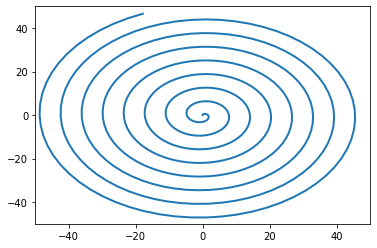

In [3]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import numpy as np 
  
# creating a blank window   
# for the animation 
fig = plt.figure() 
axis = plt.axes(xlim =(-50, 50),
                ylim =(-50, 50)) 
  
line, = axis.plot([], [], lw = 2) 
   
# what will our line dataset
# contain?
def init(): 
    line.set_data([], []) 
    return line, 
   
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], [] 
   
# animation function 
def animate(i): 
    # t is a parameter which varies
    # with the frame number
    t = 0.1 * i 
       
    # x, y values to be plotted 
    x = t * np.sin(t) 
    y = t * np.cos(t) 
       
    # appending values to the previously 
    # empty x and y data holders 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
      
    return line,
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames = 500, interval = 20, blit = True) 
   
# saves the animation in our desktop
anim.save('data/growingCoil.mp4', writer = 'ffmpeg', fps = 30)

## example 3
url https://pythonforundergradengineers.com/live-plotting-with-matplotlib.html

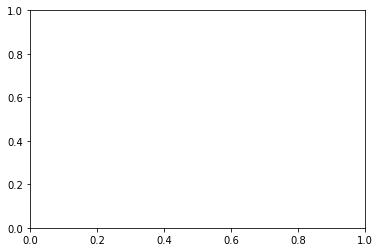

In [4]:
# plot_web_api_realtime.py
"""
A live auto-updating plot of random numbers pulled from a web API
"""

import time
import datetime as dt
import requests
import matplotlib.pyplot as plt
import matplotlib.animation as animation

url = "https://qrng.anu.edu.au/API/jsonI.php?length=1&type=uint8"

# function to pull out a float from the requests response object
def pull_float(response):
    jsonr = response.json()
    strr = jsonr["data"][0]
    if strr:
        fltr = round(float(strr), 2)
        return fltr
    else:
        return None


# Create figure for plotting
fig, ax = plt.subplots()
xs = []
ys = []

def animate(i, xs:list, ys:list):
    # grab the data from thingspeak.com
    response = requests.get(url)
    flt = pull_float(response)
    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S'))
    ys.append(flt)
    # Limit x and y lists to 10 items
    xs = xs[-10:]
    ys = ys[-10:]
    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)
    # Format plot
    ax.set_ylim([0,255])
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.20)
    ax.set_title('Plot of random numbers from https://qrng.anu.edu.au')
    ax.set_xlabel('Date Time (hour:minute:second)')
    ax.set_ylabel('Random Number')

# Set up plot to call animate() function every 1000 milliseconds
ani = animation.FuncAnimation(fig, animate, fargs=(xs,ys), interval=1000)

plt.show()